In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df_car = pd.read_csv('./code/한국교통안전공단_자동차결함 리콜현황_20221231.csv', encoding='cp949')
df_car

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [3]:
df_car.columns

Index(['제작자', '차명', '생산기간(부터)', '생산기간(까지)', '리콜개시일', '리콜사유'], dtype='object')

In [4]:
df_car.columns = 'maker','carName','make_start','make_end','recall_startDay','recall_reason'

---
제조사별 리콜 현황

In [5]:
df_car['maker'].unique()

array(['혼다코리아(주)', '폭스바겐그룹코리아 주식회사', '메르세데스벤츠코리아(주)', '비엠더블유코리아(주)',
       '만트럭버스코리아(주)', '포르쉐코리아 주식회사', '주식회사 마이브', '현대자동차(주)',
       '테슬라코리아 유한회사', '스텔란티스코리아주식회사', '화창상사(주)', '범한자동차 주식회사', '기아주식회사',
       '(유)기흥모터스', '르노코리아자동차 주식회사', '(주) 한국모터트레이딩', '포드세일즈서비스코리아(유)',
       '(주) 바이크코리아', '다임러트럭코리아(주)', '대전기계공업(주)', '(주)에프엠케이',
       '기흥인터내셔널 유한회사', '(주)재규어랜드로버코리아', '(주)피라인', '한국토요타자동차(주)',
       '볼보트럭코리아(주)', '(주)볼보자동차코리아', '지엠코리아(주)', '(주)다산중공업', '한국지엠(주)',
       '폴스타오토모티브코리아 유한회사', '모토스타코리아(주)', '스카니아코리아그룹(주)', '유한회사 모토로싸',
       '한신특장', '(주)스포츠모터사이클코리아'], dtype=object)

In [6]:
df_recallCount = pd.DataFrame(df_car['maker'].value_counts())
df_recallCount.columns = ['count']
df_recallCount

,count
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),330
폭스바겐그룹코리아 주식회사,216
현대자동차(주),61
만트럭버스코리아(주),41
기아주식회사,38
포드세일즈서비스코리아(유),37
(주)에프엠케이,31
스텔란티스코리아주식회사,31
(주)재규어랜드로버코리아,26


In [7]:
count, makerBin_dividers = np.histogram(df_recallCount['count'], bins=3)
df_recallCount['bin'] = pd.cut(x=df_recallCount['count'],
                                 bins=makerBin_dividers,
                                 labels=['few','middle','many'],
                                 include_lowest=True)
df_recallCount

,count,bin
비엠더블유코리아(주),432,many
메르세데스벤츠코리아(주),330,many
폭스바겐그룹코리아 주식회사,216,middle
현대자동차(주),61,few
만트럭버스코리아(주),41,few
기아주식회사,38,few
포드세일즈서비스코리아(유),37,few
(주)에프엠케이,31,few
스텔란티스코리아주식회사,31,few
(주)재규어랜드로버코리아,26,few


<AxesSubplot:>

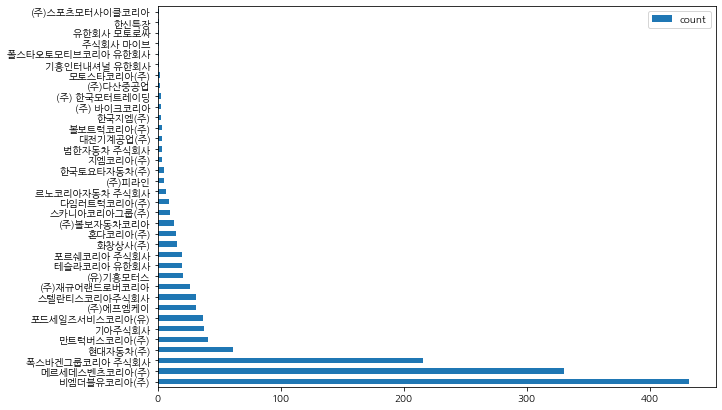

In [8]:
df_recallCount.plot(kind='barh',figsize=(10,7))

---
모델별 리콜 현황

In [9]:
print(df_car.info())
df_car

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   maker            1419 non-null   object
 1   carName          1419 non-null   object
 2   make_start       1419 non-null   object
 3   make_end         1419 non-null   object
 4   recall_startDay  1419 non-null   object
 5   recall_reason    1419 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB
None


,maker,carName,make_start,make_end,recall_startDay,recall_reason
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [10]:
df_model = pd.DataFrame(df_car.carName.value_counts())
print(df_model.info())
df_model.columns=['count']
df_model

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 328i to 1290 SUPER DUKE R
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   carName  728 non-null    int64
dtypes: int64(1)
memory usage: 11.4+ KB
None


,count
328i,25
TGX,22
TGS,18
C 300,13
328xi,11
...,...
Citroen C3 Aircross 1.5 BlueHDi,1
Citroen C4 Cactus 1.5 BlueHDi(EAT6),1
Citroen Grand C4 Spacetourer 1.5 BlueHDi,1
DS3 Crossback 1.5 BlueHDi,1


In [11]:
count, modelBin_dividers = np.histogram(df_model['count'],bins=3)
df_model['bin'] = pd.cut(x=df_model['count'],
                       bins=modelBin_dividers,
                       labels=['few','medium','many'],
                       include_lowest=True)
df_model

,count,bin
328i,25,many
TGX,22,many
TGS,18,many
C 300,13,medium
328xi,11,medium
...,...,...
Citroen C3 Aircross 1.5 BlueHDi,1,few
Citroen C4 Cactus 1.5 BlueHDi(EAT6),1,few
Citroen Grand C4 Spacetourer 1.5 BlueHDi,1,few
DS3 Crossback 1.5 BlueHDi,1,few


In [12]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 328i to 1290 SUPER DUKE R
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   count   728 non-null    int64   
 1   bin     728 non-null    category
dtypes: category(1), int64(1)
memory usage: 12.2+ KB


In [13]:
# count = 1 떨어뜨리기 방법 1번
idx = df_model[df_model['count'] == 1].index
df_model.drop(idx, axis=0,inplace=True)

# 방법 2번
# df_model = df_model[df_model['count'] != 1]
df_model.loc['etc'] =[1,'few']
df_model

,count,bin
328i,25,many
TGX,22,many
TGS,18,many
C 300,13,medium
328xi,11,medium
...,...,...
쏘울(PS),2,few
S6 TDI,2,few
Q8 50 TDI qu. Premium,2,few
Q8 45 TDI qu. Premium,2,few


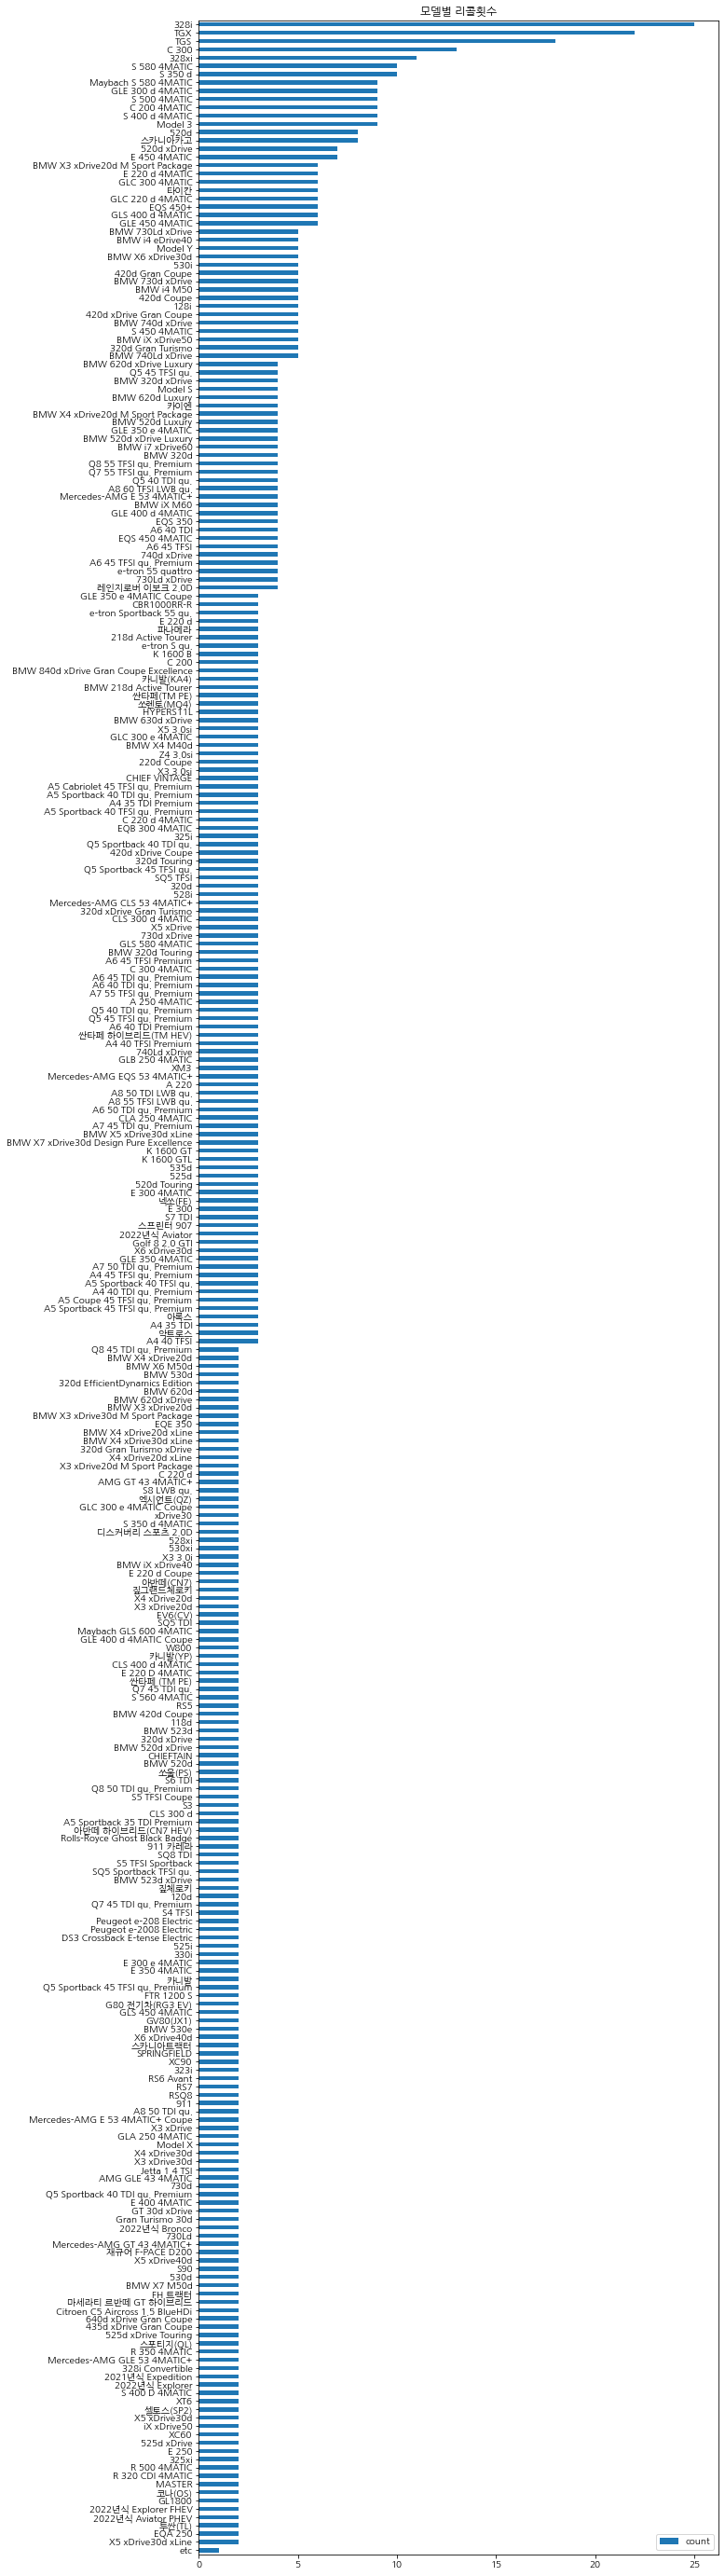

In [14]:
df_model = df_model.sort_values(by=['count'],ascending=True)
df_model.plot(kind='barh',figsize=(10,50))

plt.title('모델별 리콜횟수')
plt.legend()
plt.show()

---
월별 리콜 현황

In [15]:
df_monthly = pd.DataFrame(df_car.recall_startDay)
df_monthly

,recall_startDay
0,2022-01-03
1,2022-01-05
2,2022-01-05
3,2022-01-05
4,2022-01-05
...,...
1414,2022-12-26
1415,2022-12-26
1416,2022-12-27
1417,2022-12-27


In [16]:
df_monthly['recall_startDay'] = pd.to_datetime(df_monthly['recall_startDay'])
# df_monthly.set_index('recall_startDay', inplace=True)
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   recall_startDay  1419 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.2 KB


In [17]:
ts_ms = pd.date_range(start=df_monthly.recall_startDay[0],
                      end = df_monthly.recall_startDay[len(df_monthly.index)-1],
                      freq='M')
ts_ms

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', freq='M')

In [18]:
df_monthly['month'] = df_monthly['recall_startDay'].dt.month
df_monthly

,recall_startDay,month
0,2022-01-03,1
1,2022-01-05,1
2,2022-01-05,1
3,2022-01-05,1
4,2022-01-05,1
...,...,...
1414,2022-12-26,12
1415,2022-12-26,12
1416,2022-12-27,12
1417,2022-12-27,12


In [19]:
df_monthlyCount = pd.DataFrame(df_monthly.month.value_counts())
print(df_monthlyCount.info())
df_monthlyCount.columns=['count']
df_monthlyCount = df_monthlyCount.sort_index(ascending=True)
df_monthlyCount

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   month   12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes
None


,count
1,55
2,177
3,123
4,172
5,91
6,152
7,85
8,138
9,87
10,136


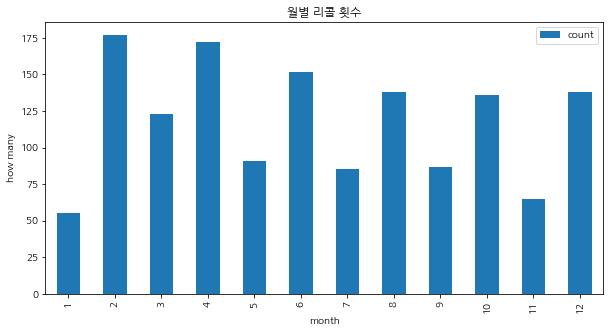

In [20]:
df_monthlyCount.plot(kind='bar', figsize=(10,5))

plt.title('월별 리콜 횟수')
plt.xlabel('month')
plt.ylabel('how many')
plt.legend(loc='best',fontsize = 10)
plt.show()

---
생산연도별 리콜 현황

In [21]:
df_car

,maker,carName,make_start,make_end,recall_startDay,recall_reason
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [22]:
df_car['make_start'] = pd.to_datetime(df_car.make_start)
print(df_car.info())
df_makeYear = pd.DataFrame(df_car.make_start.dt.year.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   maker            1419 non-null   object        
 1   carName          1419 non-null   object        
 2   make_start       1419 non-null   datetime64[ns]
 3   make_end         1419 non-null   object        
 4   recall_startDay  1419 non-null   object        
 5   recall_reason    1419 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 66.6+ KB
None


In [23]:
df_makeYear.sort_index(ascending=True, inplace=True)
df_makeYear.index.name = 'year'

# df_makeYear.reset_index(inplace=True)
# df_makeYear.columns = 'year','count'

df_makeYear

,make_start
year,
2004,2
2005,21
2006,27
2007,17
2008,11
2009,24
2010,14
2011,11
2012,23


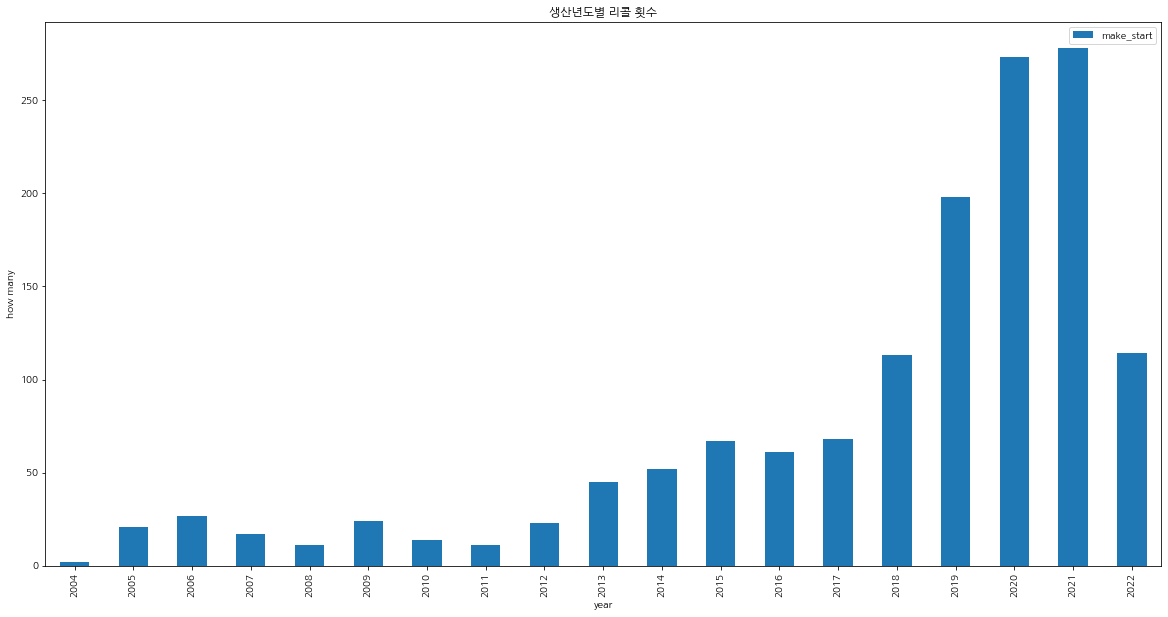

In [24]:
df_makeYear.plot(kind='bar',figsize=(20,10))

plt.title('생산년도별 리콜 횟수')
plt.xlabel('year')
plt.ylabel('how many')
plt.legend(loc='best',fontsize = 10)
plt.show()

---
리콜 사유 시각화

In [25]:
df_car

,maker,carName,make_start,make_end,recall_startDay,recall_reason
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [26]:
df_reason = pd.DataFrame(df_car.recall_reason.value_counts())
df_reason.index.name = 'reason'
df_reason_nonums = df_reason.copy()
df_reason

,recall_reason
reason,
배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,149
"블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive temperature coefficient) 발열체*와 구리관 사이가 벌어진 상태로 조립되었을 가능성이 발견되었습니다.",90
"특정 기간 동안 생산/수입된 일부 차량의 소프트웨어 업데이트 과정에서 적절하지 않은 소프트웨어가 탑재되었을 가능성이 있습니다. 이로 인하여 후진 기어 선택 시, 후방 카메라 영상이 제대로 표시되지 않을 수 있으며, 이는 ‘자동차 및 자동차 부품의 성능과 기준에 관한 규칙’ 제53조의2(후방보행자 안전장치)의 일부를 준수하지 않아 국내 자동차 안전 기준을 충족하지 않습니다.",61
"후방 액슬서스펜션 링크 고정너트 부식으로 인한 내구성 저하 가능성으로 시행한 고정 너트를 교체하는 시정 조치 시, 후방 차축의 휠얼라인먼트(토우 및 캠버)가 변경되었을 가능성이 있습니다. *액슬서스펜션링크: 차체와 바퀴를 연결하며, 차체의 중량을 지지함과 동시에 동력을 전달하는 장치로써, 승차감 향상과 차량 자세를 안정된 상태로 유지하는 기능을 함.",45
냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진공 시스템과 냉각수 라인 사이의 실링(sealing)에 응력이 증가되어 냉각수 누수가 발생될 수 있습니다. 이러한 경우 냉각수 펌프 또는 배기 재순환 밸브의 전기 스위치 밸브에 냉각수가 유입될 수 있습니다.,41
...,...
"일부 2022년식 Mustang은 잘못된 생산 장비 설정으로 전방 모니터링 카메라가 잘못 세팅(정렬) 되어 충돌 사전 지원, 적응형 크루즈 컨트롤, 차선 유지 시스템, 운전자 경고 시스템 및 자동 하이빔 컨트롤과 같은 기능이 정상적으로 작동하지 않아 사고가 발생할 가능성이 있어 제작결함을 시정하고자 합니다.",1
48V 배터리와 연결배선의 고정 너트가 제대로 조여지지 않아 접촉 불량 발생 가능성이 있음,1
"GV80 (JX1) 차량에서 타이어공기압경고장치의 경고등 점등을 위한 소프트웨어 설정값 오류로 주행중 타이어 압력 저하시 경고등이 점등되지 않는 타이어공기압경고장치의 안전기준을 만족하지 못하는 결함 (판매된 시승차량을 사내 용도차량으로 판단 오인하여 리콜 대상차량으로 제외 시킴 , 리콜 미대상차량 입고시 대상기간에 포함된 차량임을 확인하고 누락된 차량임을 확인하였으며 시정조치 실시하기 위함)",1


In [27]:
# df_reason.reset_index(inplace=True)
df_reason.index = df_reason.index.str[:20]+'...'
# sorted(df_reason.recall_reason, reverse=True)

df_reason

,recall_reason
reason,
배기가스재순환장치 쿨러 내부 냉각수 ...,149
"블로우바이히터 조립 공정 중, 블로우...",90
특정 기간 동안 생산/수입된 일부 차...,61
후방 액슬서스펜션 링크 고정너트 부식...,45
냉각수 펌프를 제어하는 엔진 컨트롤 ...,41
...,...
일부 2022년식 Mustang은 잘...,1
48V 배터리와 연결배선의 고정 너트...,1
GV80 (JX1) 차량에서 타이어공...,1


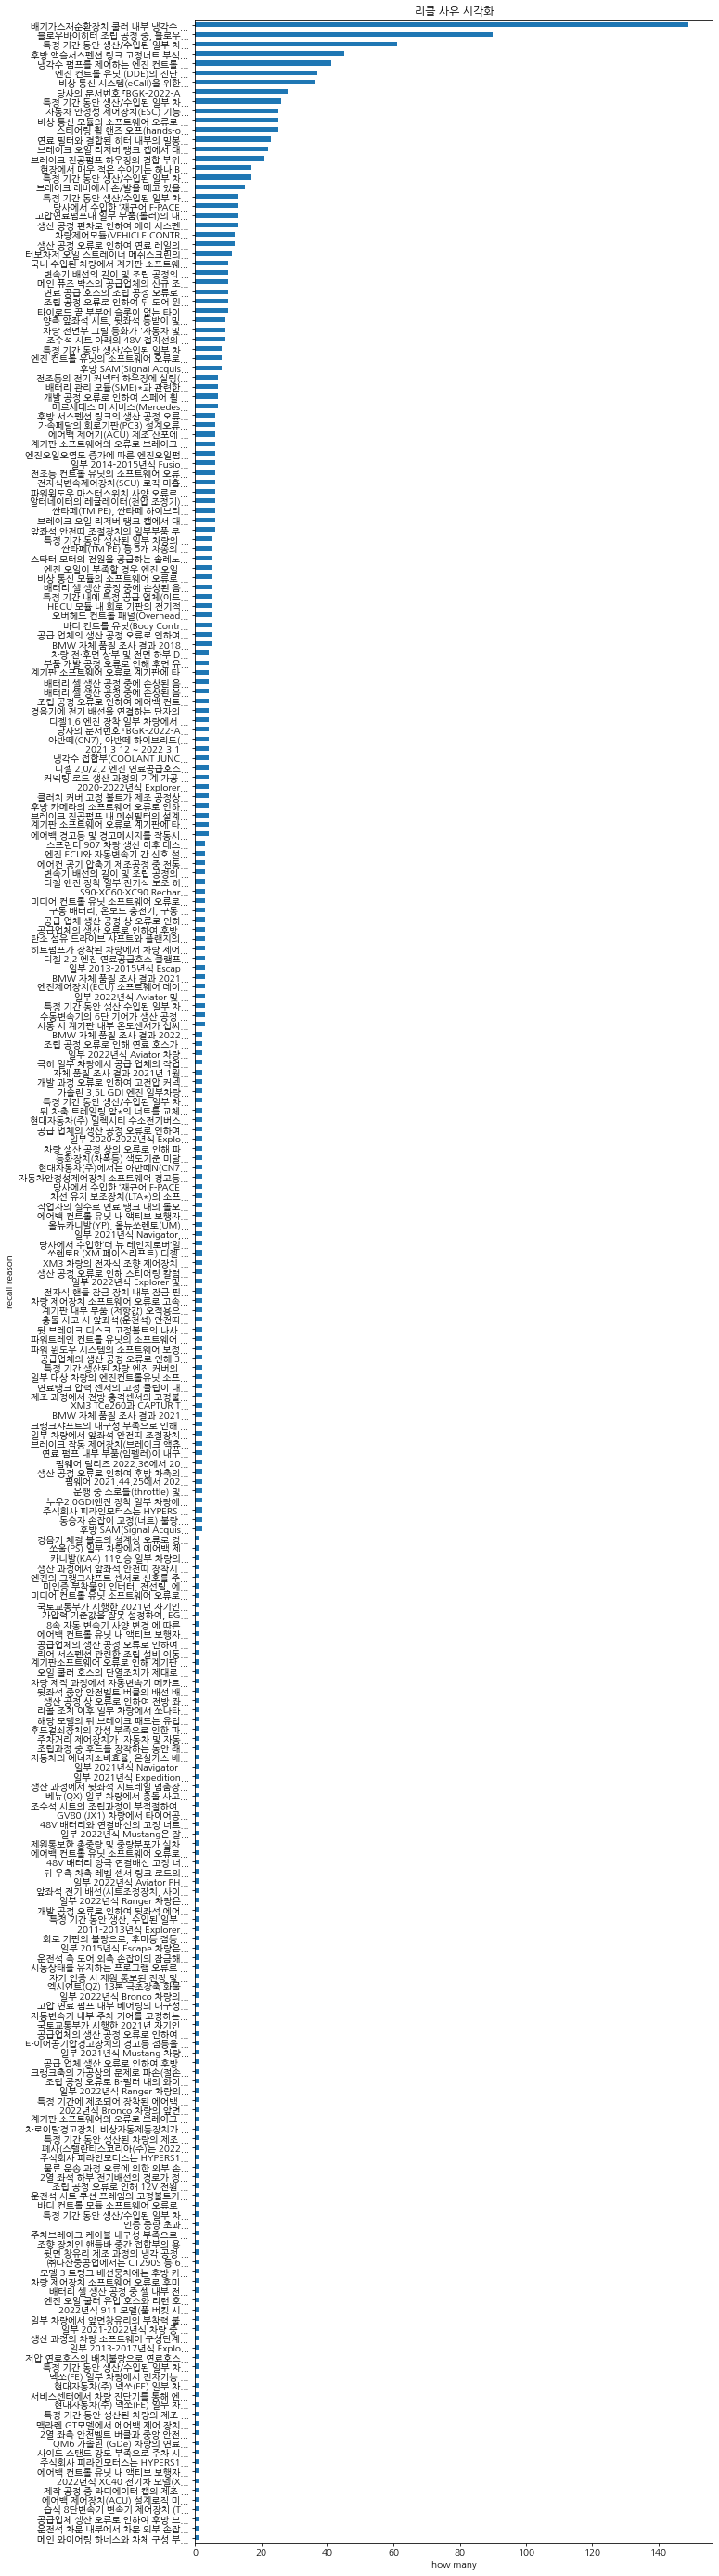

In [28]:
df_reason = df_reason.sort_values(by=['recall_reason'],ascending=True)

df_reason.plot(kind='barh',figsize=(10,50))

plt.title('리콜 사유 시각화')
plt.xlabel('how many')
plt.ylabel('recall reason')
plt.legend().remove()
plt.show()


---
오늘 배운 것처럼 리콜 사유 그래프 및 시각화

In [29]:
df_reason_nonums.reset_index(inplace=True)
reasons = df_reason_nonums.reason.unique()
reasons

array(['배기가스재순환장치 쿨러 내부 냉각수 누설 가능성',
       '블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive temperature coefficient) 발열체*와 구리관 사이가 벌어진 상태로 조립되었을 가능성이 발견되었습니다.',
       '특정 기간 동안 생산/수입된 일부 차량의 소프트웨어 업데이트 과정에서 적절하지 않은 소프트웨어가 탑재되었을 가능성이 있습니다. 이로 인하여 후진 기어 선택 시, 후방 카메라 영상이 제대로 표시되지 않을 수 있으며, 이는 ‘자동차 및 자동차 부품의 성능과 기준에 관한 규칙’ 제53조의2(후방보행자 안전장치)의 일부를 준수하지 않아 국내 자동차 안전 기준을 충족하지 않습니다.',
       '후방 액슬서스펜션 링크 고정너트 부식으로 인한 내구성 저하 가능성으로 시행한 고정 너트를 교체하는 시정 조치 시, 후방 차축의 휠얼라인먼트(토우 및 캠버)가 변경되었을 가능성이 있습니다. *액슬서스펜션링크: 차체와 바퀴를 연결하며, 차체의 중량을 지지함과 동시에 동력을 전달하는 장치로써, 승차감 향상과 차량 자세를 안정된 상태로 유지하는 기능을 함.',
       '냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진공 시스템과 냉각수 라인 사이의 실링(sealing)에 응력이 증가되어 냉각수 누수가 발생될 수 있습니다. 이러한 경우 냉각수 펌프 또는 배기 재순환 밸브의 전기 스위치 밸브에 냉각수가 유입될 수 있습니다.',
       '엔진 컨트롤 유닛 (DDE)의 진단 관련 소프트웨어의 오류가 있는 것을 확인하였습니다.',
       '비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량 충돌로 인한 통신 모듈의 전원 공급이 일시적으로 중단된 경우, 차량 위치가 잘못 전송 될 수 있습니다.',
       '당사의 문서번호 『BGK-2022-A61-027』로 제출한 엔진 컨트롤유닛(DDE) 시정조치계획보고 『2022RIV063

In [30]:
reason_list = reasons.tolist()
print(type(reason_list))
reason_list

<class 'list'>


['배기가스재순환장치 쿨러 내부 냉각수 누설 가능성',
 '블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive temperature coefficient) 발열체*와 구리관 사이가 벌어진 상태로 조립되었을 가능성이 발견되었습니다.',
 '특정 기간 동안 생산/수입된 일부 차량의 소프트웨어 업데이트 과정에서 적절하지 않은 소프트웨어가 탑재되었을 가능성이 있습니다. 이로 인하여 후진 기어 선택 시, 후방 카메라 영상이 제대로 표시되지 않을 수 있으며, 이는 ‘자동차 및 자동차 부품의 성능과 기준에 관한 규칙’ 제53조의2(후방보행자 안전장치)의 일부를 준수하지 않아 국내 자동차 안전 기준을 충족하지 않습니다.',
 '후방 액슬서스펜션 링크 고정너트 부식으로 인한 내구성 저하 가능성으로 시행한 고정 너트를 교체하는 시정 조치 시, 후방 차축의 휠얼라인먼트(토우 및 캠버)가 변경되었을 가능성이 있습니다. *액슬서스펜션링크: 차체와 바퀴를 연결하며, 차체의 중량을 지지함과 동시에 동력을 전달하는 장치로써, 승차감 향상과 차량 자세를 안정된 상태로 유지하는 기능을 함.',
 '냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진공 시스템과 냉각수 라인 사이의 실링(sealing)에 응력이 증가되어 냉각수 누수가 발생될 수 있습니다. 이러한 경우 냉각수 펌프 또는 배기 재순환 밸브의 전기 스위치 밸브에 냉각수가 유입될 수 있습니다.',
 '엔진 컨트롤 유닛 (DDE)의 진단 관련 소프트웨어의 오류가 있는 것을 확인하였습니다.',
 '비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량 충돌로 인한 통신 모듈의 전원 공급이 일시적으로 중단된 경우, 차량 위치가 잘못 전송 될 수 있습니다.',
 '당사의 문서번호 『BGK-2022-A61-027』로 제출한 엔진 컨트롤유닛(DDE) 시정조치계획보고 『2022RIV063』와 관련하여 BMW 독일 본사로부터 추가 대상 차량을 전달 받아 추가 보고 드립니다.

In [31]:
import konlpy
import re

In [32]:
df_reasons = pd.DataFrame(reasons)
df_reasons

,0
0,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1,"블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive temperat..."
2,특정 기간 동안 생산/수입된 일부 차량의 소프트웨어 업데이트 과정에서 적절하지 않은...
3,후방 액슬서스펜션 링크 고정너트 부식으로 인한 내구성 저하 가능성으로 시행한 고정 ...
4,냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진...
...,...
260,일부 2022년식 Mustang은 잘못된 생산 장비 설정으로 전방 모니터링 카메라가...
261,48V 배터리와 연결배선의 고정 너트가 제대로 조여지지 않아 접촉 불량 발생 가능성...
262,GV80 (JX1) 차량에서 타이어공기압경고장치의 경고등 점등을 위한 소프트웨어 설...
263,리어 서스펜션 관련한 조립 설비 이동 후 리어 서스펜션 토우 링크의 조립 불량 방지...


In [33]:
reason_nonus = []
for i in reason_list:
    nonus = konlpy.tag.Hannanum().nouns(i)
    for j in nonus:
        reason_nonus.append(j)
reason_nonus

['배기가스재순환장치',
 '쿨러',
 '내부',
 '냉각수',
 '누설',
 '가능성',
 '블로우바이히터',
 '조립',
 '공정',
 '중',
 '블로우바이히터',
 '발열체*',
 '구리관',
 '사이',
 '상태',
 '조립',
 '가능성',
 '발견',
 '특정',
 '기간',
 '동안',
 '생산',
 '수입',
 '일부',
 '차량',
 '소프트웨어',
 '업데이트',
 '과정',
 '적절',
 '소프트웨어',
 '탑재',
 '가능성',
 '이',
 '후진',
 '기',
 '선택',
 '시',
 '후방',
 '카메라',
 '영상',
 '표시',
 '수',
 '이',
 '‘자동차',
 '자동차',
 '부품',
 '성능',
 '기준',
 '규칙’',
 '제53조의2(후방보행자',
 '안전장치',
 '일부',
 '준수',
 '국내',
 '자동차',
 '전',
 '기준',
 '충족',
 '후방',
 '액슬서스펜션',
 '링크',
 '고정너트',
 '부식',
 '내구성',
 '저하',
 '가능성',
 '시행',
 '고정',
 '너트',
 '교체',
 '시정',
 '조치',
 '시',
 '후방',
 '차축',
 '휠얼라인먼트(토우',
 '캠버)',
 '변경',
 '가능성',
 '*액슬서스펜션링크:',
 '차체',
 '바퀴',
 '연결',
 '차체',
 '중량',
 '동력',
 '전달',
 '장치',
 '승차감',
 '향상',
 '차량',
 '자세',
 '안정',
 '상태',
 '유',
 '기능',
 '함',
 '냉각수',
 '펌프',
 '제',
 '엔진',
 '컨트롤',
 '유닛',
 '소프트웨어',
 '오류',
 '냉각수',
 '펌프내',
 '진공',
 '시스템',
 '냉각수',
 '라',
 '사이',
 '실링(sealing)',
 '응력',
 '증가',
 '냉각수',
 '누수',
 '발생',
 '수',
 '경우',
 '냉각수',
 '펌프',
 '배',
 '재순환',
 '밸브',
 '전기',
 '스위치',
 '밸브',
 '냉각수',
 '유입',
 '수',

In [34]:
df_reasons = pd.DataFrame(reasons)
df_reasons

,0
0,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1,"블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive temperat..."
2,특정 기간 동안 생산/수입된 일부 차량의 소프트웨어 업데이트 과정에서 적절하지 않은...
3,후방 액슬서스펜션 링크 고정너트 부식으로 인한 내구성 저하 가능성으로 시행한 고정 ...
4,냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진...
...,...
260,일부 2022년식 Mustang은 잘못된 생산 장비 설정으로 전방 모니터링 카메라가...
261,48V 배터리와 연결배선의 고정 너트가 제대로 조여지지 않아 접촉 불량 발생 가능성...
262,GV80 (JX1) 차량에서 타이어공기압경고장치의 경고등 점등을 위한 소프트웨어 설...
263,리어 서스펜션 관련한 조립 설비 이동 후 리어 서스펜션 토우 링크의 조립 불량 방지...


In [35]:
df_reasonNonus = pd.DataFrame({'word':reason_nonus})
df_reasonNonus

,word
0,배기가스재순환장치
1,쿨러
2,내부
3,냉각수
4,누설
...,...
6575,수
6576,연결
6577,전기
6578,배선


In [36]:
df_reasonNonus = df_reasonNonus[(df_reasonNonus['word'].str.len()>=2)]
df_reasonNonus['count'] = 1
df_reasonNonus

/tmp/ipykernel_761000/540414892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonNonus['count'] = 1


,word,count
0,배기가스재순환장치,1
1,쿨러,1
2,내부,1
3,냉각수,1
4,누설,1
...,...,...
6574,신호,1
6576,연결,1
6577,전기,1
6578,배선,1


In [37]:
df_reasonNonus = df_reasonNonus.groupby(by='word', as_index=False).agg(count=('word','count')).sort_values('count', ascending=False)
df_reasonNonus

,word,count
1293,차량,177
191,가능성,108
919,오류,96
1020,일부,83
532,발생,82
...,...,...
653,비상탈출장치,1
655,빨간색,1
656,사고기록장치,1
657,사고기록장치(EDR),1


<AxesSubplot:xlabel='count', ylabel='word'>

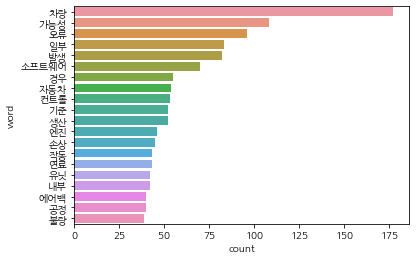

In [38]:
sns.barplot(data=df_reasonNonus.head(20),y='word',x='count')

In [39]:
dic_reason_word = df_reasonNonus.set_index('word').to_dict()['count']
dic_reason_word

{'차량': 177,
 '가능성': 108,
 '오류': 96,
 '일부': 83,
 '발생': 82,
 '소프트웨어': 70,
 '경우': 55,
 '자동차': 54,
 '컨트롤': 53,
 '기준': 52,
 '생산': 52,
 '엔진': 46,
 '손상': 45,
 '작동': 43,
 '연료': 43,
 '유닛': 42,
 '내부': 42,
 '에어백': 40,
 '공정': 40,
 '불량': 39,
 '장착': 38,
 '고정': 38,
 '성능': 33,
 '충돌': 32,
 '주행': 31,
 '장치': 31,
 '브레이크': 29,
 '부족': 28,
 '확인': 28,
 '특정': 28,
 '상태': 27,
 '조립': 27,
 '배터리': 26,
 '경고등': 25,
 '시스템': 24,
 '공급': 24,
 '센서': 24,
 '후방': 23,
 '점등': 23,
 '결함': 23,
 '과정': 23,
 '운전자': 21,
 '배선': 19,
 '시트': 19,
 '커넥터': 19,
 '내구성': 19,
 '오일': 18,
 '동안': 18,
 '위치': 18,
 '볼트': 18,
 '연결': 18,
 '제조': 17,
 '파손': 17,
 '시동': 17,
 '뒷좌석': 17,
 '분리': 17,
 '기능': 17,
 '기간': 17,
 '사용': 17,
 '계기판': 16,
 '좌석': 16,
 '증가': 16,
 '외부': 16,
 '정상적': 16,
 '규칙': 16,
 '냉각수': 15,
 '자동차부품': 15,
 '부품': 15,
 '탑승자': 15,
 '표시': 15,
 '전기': 15,
 '안전벨트': 15,
 '안전띠': 15,
 '만족': 15,
 '해당': 14,
 '경고': 14,
 '발견': 14,
 '모듈': 14,
 '수입': 14,
 '충족': 14,
 '이탈': 14,
 '설치': 14,
 '변속기': 14,
 '고전압': 13,
 '전원': 13,
 '사이': 13,
 '체결': 13,
 '밸브': 12,
 '

In [40]:
from wordcloud import WordCloud
font = 'NanumGothic'

In [41]:
wc = WordCloud(random_state=1234,
               font_path=font,
               width=400,
               height=400,
               background_color='white'
               )

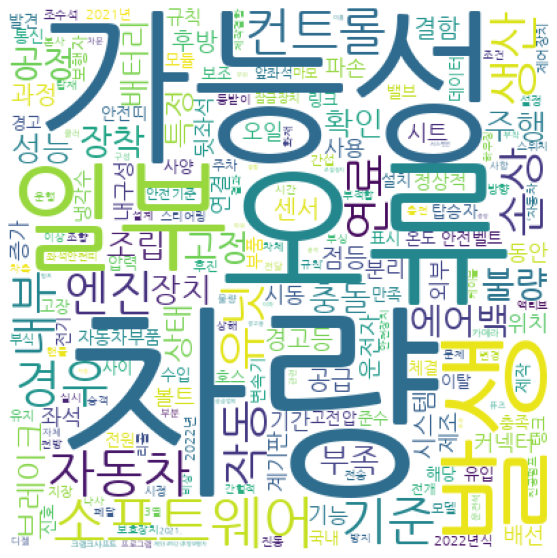

In [42]:
img_world = wc.generate_from_frequencies(dic_reason_word)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_world)